<table> 
    <tr>
        <td  style="background-color:#ffffff;"><a href="https://qsoftware.lu.lv/index.php/qworld/" target="_blank"><img src="../../images/qworld.jpg" width="70%" align="left"></a></td>
        <td style="background-color:#ffffff;" width="*"></td>        
    </tr></table>
<table><tr style="background-color:white;">
    <td>Follow QWorld</td>
    <td><a href="https://www.facebook.com/qworld19/" target="_blank"><img src="../../images/facebook-icon.png" width="30px"></a></td>
    <td><a href="https://twitter.com/QWorld19" target="_blank"><img src="../../images/twitter-icon.png" width="30px"></a></td>

**author:** Cheshta Joshi

# 1. Creating Quantum Circuit

## Qiskit
Quantum circuit created using [QuantumCircuit](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html) class

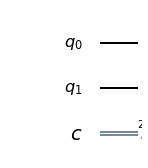

In [1]:
# Initializing with 2 qubits in the zero state; with 2 classical bits set to zero
from qiskit import QuantumCircuit
circuit = QuantumCircuit(2, 2)
circuit.draw(output = 'mpl')

Add gates (operations) to the circuit to manipulate quantum registers

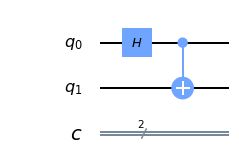

In [2]:
circuit.h(0) # A Hadamard gate H 
circuit.cx(0, 1) # A controlled-Not operation (CX)
circuit.draw(output = 'mpl')

## PennyLane

Quantum circuit is constructed as a special Python function.

In [3]:
import pennylane as qml

def my_quantum_function(x, y):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(y, wires=1)
    return qml.expval(qml.PauliZ(1))

# 2. Quantum Subsystems

PennyLane uses the term 'wires' to refer to a quantum subsystem which corresponds to a qubit.

In [4]:
import pennylane as qml
qml.CNOT(wires=[0,1])

CNOT(wires=[0, 1])

# 3. Quantum Devices 

## Qiskit
Qiskit uses the term 'backend' or 'device' to refer to the quantum devices on which the circuits run. There are two types of backends

1.[QiskitAer](https://qiskit.org/aer/) : High performace simulator framework which runs on Local machine. Simulators can generate both ideal and noisy models.

In [5]:
# Print list of all the Aer simulators
from qiskit import Aer
for backend in Aer.backends():
    print(backend.name())

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


2.[IBMQ](https://qiskit.org/ibmqaccount) : Provides access to cloud-based IBM Quantum systems and simulators.

In [1]:
# Choose a real device to simulate
from qiskit import IBMQ
IBMQ.enable_account('Enter API here')
#IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
device = provider.get_backend('ibmq_16_melbourne')

## PennyLane

PennyLane uses the term 'devices' to refer to the quantum devices on which the circuits run. The device can be a hardware device or a simulator. [Device](https://pennylane.readthedocs.io/en/stable/code/api/pennylane.Device.html) class is used to instantiate it. PennyLane offers some basic devices such as the 'default.qubit' and 'default.gaussian' simulators; additional devices can be installed as [plugins](https://pennylane.ai/plugins.html).

In [8]:
# Instantiate default.qubit simulator with 2 qubits
import pennylane as qml
dev = qml.device('default.qubit', wires=2, shots=1000, analytic=False)